In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

In [7]:
data["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [8]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

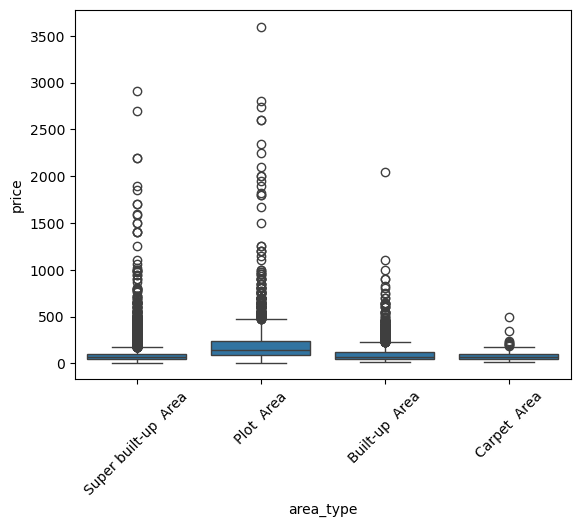

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='area_type', y='price', data=data)
plt.xticks(rotation=45)
plt.show()


In [18]:
data.drop(columns=["area_type","availability","society","balcony"],inplace = True)

In [19]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [25]:
data["location"].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [27]:
data["location"] = data["location"].fillna("Sarjapur  Road")

In [29]:
data["size"].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [31]:
data["size"] = data["size"].fillna("2 BHK")

In [33]:
data["bath"] = data["bath"].fillna(data["bath"].median())

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [37]:
data["bhk"]=data["size"].str.split().str.get(0).astype(int)

In [39]:
data[data["bhk"] >20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [41]:
data.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [43]:
data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [45]:
def convertRange(x):

    temp = x.split("-")
    if len(temp) == 2 :
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [47]:
data["total_sqft"] = data["total_sqft"].apply(convertRange)

In [49]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### Price Per Square feet

In [52]:
data["price_per_sqft"] = data["price"] * 100000 /data["total_sqft"]

In [54]:
data["price_per_sqft"]

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [56]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [58]:
data["location"].value_counts()

location
Whitefield                        540
Sarjapur  Road                    400
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [60]:
data["location"] = data["location"].apply(lambda x: x.strip())
location_count = data["location"].value_counts()

In [62]:
location_count

location
Whitefield                        541
Sarjapur  Road                    400
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1294, dtype: int64

In [64]:
location_count_lessthan_10 = location_count[location_count <= 10]
location_count_lessthan_10

location
Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1053, dtype: int64

In [66]:
data["location"] = data["location"].apply(lambda x: "other" if x in location_count_lessthan_10 else x)

In [68]:
data["location"].value_counts()

location
other                 2885
Whitefield             541
Sarjapur  Road         400
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [70]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [72]:
(data["total_sqft"]/data["bhk"]).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [74]:
data = data[((data["total_sqft"]/data["bhk"]) >= 300)]

In [76]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [78]:
data.shape

(12530, 7)

In [80]:
data.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [82]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [84]:
num = ["bhk","price_per_sqft","bath"]

In [86]:
def remove_outlier_iqr(df,columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_limit)& (df[col] <= upper_limit)]
    return df 

data = remove_outlier_iqr(data, num)

In [88]:
data.shape

(10957, 7)

In [90]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000
mean,1424.764145,2.320891,78.626881,2.459067,5330.729324
std,896.804363,0.685461,56.699698,0.688592,1677.876711
min,300.000000,1.000000,8.440000,1.000000,371.428571
25%,1100.000000,2.000000,46.500000,2.000000,4100.000000
50%,1255.000000,2.000000,65.000000,2.000000,5042.462845
75%,1578.000000,3.000000,92.000000,3.000000,6297.648013
max,36000.000000,4.000000,2100.000000,4.000000,10740.740741


In [92]:
data[data["total_sqft"] >= 36000]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5469,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250.0


In [94]:
data = data[data["bhk"] < 10]
data = data[(data['total_sqft'] / data['bhk']) >= 300]
data = data[(data['total_sqft'] / data['bhk']) <= 2000]
data = data.drop(['price_per_sqft', 'size'], axis=1)

In [96]:
data.describe()

,total_sqft,bath,price,bhk
count,10934.000000,10934.000000,10934.000000,10934.000000
mean,1401.144022,2.320285,78.059606,2.458753
std,577.568346,0.683551,51.971819,0.686791
min,300.000000,1.000000,8.440000,1.000000
25%,1100.000000,2.000000,46.457500,2.000000
50%,1255.000000,2.000000,64.745000,2.000000
75%,1575.000000,3.000000,91.772500,3.000000
max,7500.000000,4.000000,625.000000,4.000000


In [98]:
data.shape

(10934, 5)

In [100]:
data.to_csv("cleaned_data.csv")

In [102]:
X = data.drop(columns = ["price"])
y = data["price"]

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [106]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [108]:
print(x_train.shape)
print(x_test.shape)

(8747, 4)
(2187, 4)


## Defining Model

In [111]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore',sparse_output = False),["location"]), 
    remainder = "passthrough"
)

In [115]:
def create_pipeline(model):
    return make_pipeline(column_trans,StandardScaler(),model)


In [117]:
lr = LinearRegression()
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.1)

In [119]:
models = {
    "Linear Regression": lr,
    "Ridge Regression": ridge,
    "Lasso Regression": lasso
}

In [121]:
for name , model in models.items():
    pipe= create_pipeline(model)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    print(f"{name},R2_score :{r2_score(y_test,y_pred):.4f}")

Linear Regression,R2_score :0.7624
Ridge Regression,R2_score :0.7625
Lasso Regression,R2_score :0.7640


## Hyperparameter tunning

In [124]:
from sklearn.model_selection import GridSearchCV

### Create pipeline for Ridge and Lasso

In [127]:
ridge_pipe = make_pipeline(column_trans,StandardScaler(),Ridge())
lasso_pipe = make_pipeline(column_trans,StandardScaler(),Lasso())

###  Define hyperparameter grids

In [130]:
ridge_param = {"ridge__alpha" :[0.01, 0.1, 1, 5, 10, 20, 50, 100]}
lasso_param = {"lasso__alpha" :[0.001, 0.01, 0.1, 1, 5, 10]}

### GridSearchCV

In [133]:
ridge_search = GridSearchCV(ridge_pipe, ridge_param, scoring= "r2",cv = 5 , n_jobs=-1)
lasso_search = GridSearchCV(lasso_pipe, lasso_param,scoring="r2",cv = 5 , n_jobs=-1)

ridge_search.fit(x_train, y_train)
lasso_search.fit(x_train,y_train)

,estimator,"Pipeline(step...o', Lasso())])"
,param_grid,"{'lasso__alpha': [0.001, 0.01, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('onehotencoder', ...)]"


In [134]:
print("Best Ridge alpha:", ridge_search.best_params_)
print("Best Ridge R2 (CV):", ridge_search.best_score_)

print("Best Lasso alpha:", lasso_search.best_params_)
print("Best Lasso R2 (CV):", lasso_search.best_score_)

Best Ridge alpha: {'ridge__alpha': 100}
Best Ridge R2 (CV): 0.7930915919637902
Best Lasso alpha: {'lasso__alpha': 0.1}
Best Lasso R2 (CV): 0.7937743408297054


In [135]:
print("Test Ridge R2:", r2_score(y_test, ridge_search.predict(x_test)))
print("Test Lasso R2:",r2_score(y_test , lasso_search.predict(x_test)))

Test Ridge R2: 0.7638619603494474
Test Lasso R2: 0.7639617386490732


### Trying xgboost 

In [140]:
from xgboost import XGBRegressor

### Feature Engineering

In [143]:
data["bath_per_bhk"] = data["bath"]/data["bhk"]
data["sqft_per_bhk"] = data["total_sqft"] / data["bhk"]
data['price_per_bath'] = data['total_sqft'] / data['bath']  # if you used this one too 
data.drop(columns=["price_per_bath"], inplace=True)

In [145]:
X = data.drop(columns = ["price"])
y = data["price"]

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [147]:
xgb = XGBRegressor(random_state=42, n_estimators=500, learning_rate= 0.10,max_depth=5,subsample=0.9,reg_lambda=2)

In [149]:
xgb_pipeline = make_pipeline(column_trans,xgb)
xgb_pipeline.fit(x_train,y_train)
print("XGB R2:",r2_score(y_test,xgb_pipeline.predict(x_test)))

XGB R2: 0.8028124511256449


In [150]:
print("Train R2:", r2_score(y_train, xgb_pipeline.predict(x_train)))
y_pred_xgb = xgb_pipeline.predict(x_test)
print("Test R2:", r2_score(y_test, y_pred_xgb))

Train R2: 0.8858410951358064
Test R2: 0.8028124511256449


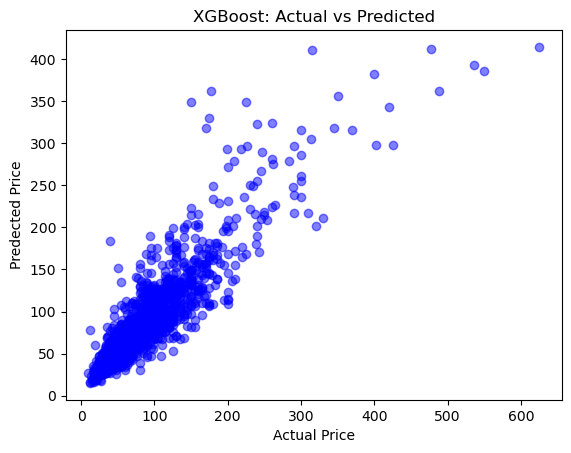

In [151]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred_xgb,color="blue",alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predected Price")
plt.title("XGBoost: Actual vs Predicted")
plt.show()

In [155]:
final_model = xgb_pipeline 

In [157]:
import joblib
joblib.dump(final_model,"house_price_xgb.pkl",compress=3)

['house_price_xgb.pkl']

In [159]:
locations =list(data["location"].unique())

In [161]:
len(locations)

241

In [163]:
joblib.dump(locations,"locations.pkl",compress=3)

['locations.pkl']